In [1]:
import pandas as pd

# Data Source

write about dataset

In [2]:
df = pd.read_csv('games.csv')
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


# Data Preparation

##### Delete extra columns and rows

In [3]:
#drop tables
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Reviews'], axis=1)
df = df.drop(['Summary'], axis=1)

#drop duplicates columns
df = df.drop(['Times Listed'], axis=1) # mesmo valores de 'Number of Reviews'

In [4]:
df = df[df['Release Date'] != 'releases on TBD']

##### format columns

In [5]:
df["Release Date"] = pd.to_datetime(df["Release Date"])
df = df[df['Release Date'] < '03-31-2023']

In [6]:
for col in ['Genres', 'Team']:
    df[col] = df[col].str.replace("[", "").str.replace("]", "").str.replace("'", "").str.replace(" ", "")

In [7]:
#substituir nome da coluna 'Number of Reviews' para 'Reviews'
df = df.rename(columns={'Number of Reviews': 'Reviews'})

In [8]:
numeric_columns = ['Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

for col in numeric_columns:
    df[col] = df[col].str.replace("K", "000")
    # transformar em float e multiplicar por 1000 apenas onde contém '.'
    df[col] = df[col].apply(lambda x: float(x)*1000 if '.' in x else x)
    df[col] = df[col].astype(int)

df[numeric_columns].head()

,Reviews,Plays,Playing,Backlogs,Wishlist
0,3900,17000,3800,4600,4800
1,2900,21000,3200,6300,3600
2,4300,30000,2500,5000,2600
3,3500,28000,679,4900,1800
4,3000,21000,2400,8300,2300


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 0 to 1511
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         1499 non-null   object        
 1   Release Date  1499 non-null   datetime64[ns]
 2   Team          1498 non-null   object        
 3   Rating        1497 non-null   float64       
 4   Reviews       1499 non-null   int32         
 5   Genres        1499 non-null   object        
 6   Plays         1499 non-null   int32         
 7   Playing       1499 non-null   int32         
 8   Backlogs      1499 non-null   int32         
 9   Wishlist      1499 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(5), object(3)
memory usage: 99.5+ KB


# Exploratory Data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

### Popularity Gender

In [11]:
# values_count geners
genres = df["Genres"].str.get_dummies(",")
genres.sum().sort_values(ascending=False).head()

Adventure    1005
RPG           515
Shooter       351
Platform      329
Indie         282
dtype: int64

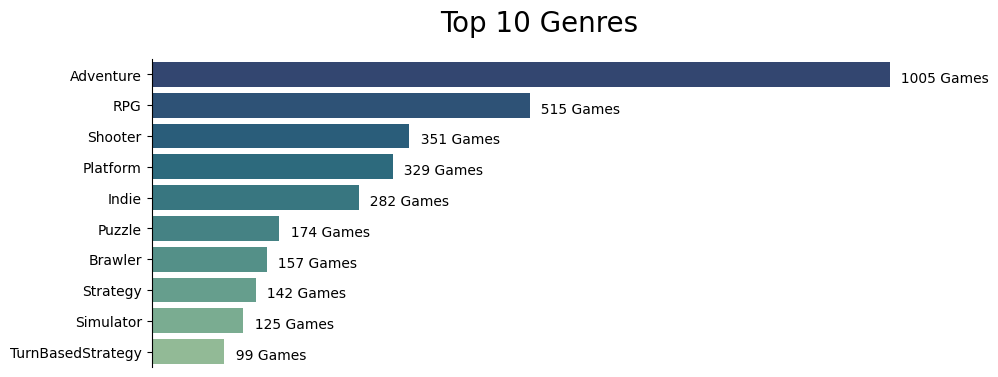

In [12]:
# plot serie genres in horizontal bar
plt.figure(figsize=(10, 4))
sns.barplot(x=genres.sum().sort_values(ascending=False).head(10), 
            y=genres.sum().sort_values(ascending=False).head(10).index,
            palette="crest_r",
            orient='h')

for i, v in enumerate(genres.sum().sort_values(ascending=False).head(10)):
    plt.text(v + 3, i + .25, '  ' + str(v) + ' Games', color='black')

plt.xticks([])
sns.despine(bottom=True)
plt.title("Top 10 Genres", fontsize=20, pad=20)
plt.show()

In [13]:
# contar a quantidade de plays por genero
genres_plays = genres.T.dot(df['Plays'])
# genres.T -> transpor a serie
# dot -> multiplicar as series
# df['Plays'] -> coluna Plays do dataframe
genres_plays.sort_values(ascending=False).head(10)

Adventure            6636434
RPG                  3291404
Shooter              2655570
Platform             2356470
Indie                1549627
Brawler              1023369
Puzzle                930929
Simulator             717260
Strategy              698759
TurnBasedStrategy     676584
dtype: int64

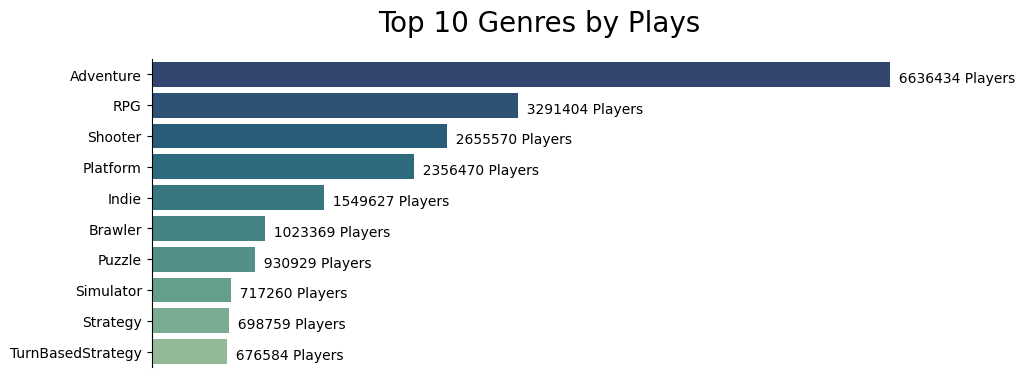

In [14]:
# plotar genres_plays.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=genres_plays.sort_values(ascending=False).head(10),
            y=genres_plays.sort_values(ascending=False).head(10).index,
            palette="crest_r",
            orient='h')

for i, v in enumerate(genres_plays.sort_values(ascending=False).head(10)):
    plt.text(v + 3, i + .25, '  ' + str(v) + ' Players', color='black')

plt.xticks([])
sns.despine(bottom=True)
plt.title("Top 10 Genres by Plays", fontsize=20, pad=20)
plt.show()

### Popularity Teams

In [15]:
# top 10 teams com mais jogos
teams = df["Team"].str.get_dummies(",")
teams.sum().sort_values(ascending=False).head(10)


Nintendo                        244
Capcom                           89
SquareEnix                       77
Sega                             63
ElectronicArts                   58
SonyComputerEntertainment        44
SonyInteractiveEntertainment     43
BandaiNamcoEntertainment         41
Konami                           39
Activision                       37
dtype: int64

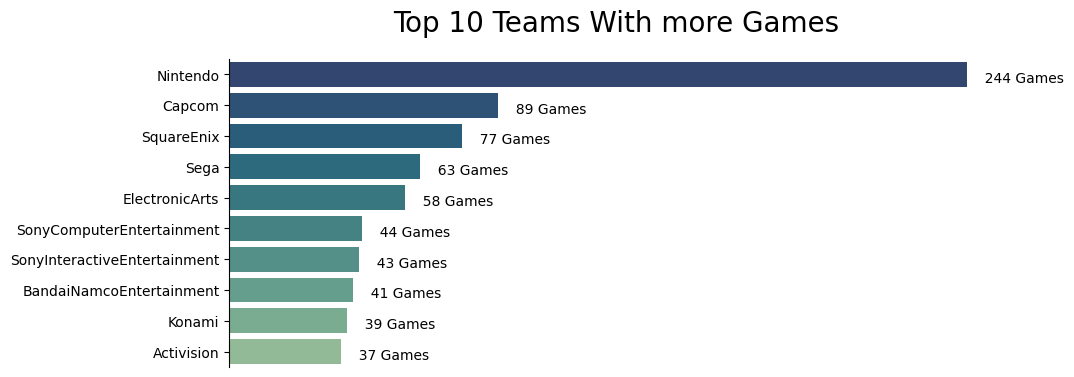

In [16]:
# tornar um grafico
plt.figure(figsize=(10, 4))
sns.barplot(x=teams.sum().sort_values(ascending=False).head(10),
            y=teams.sum().sort_values(ascending=False).head(10).index,
            palette="crest_r",
            orient='h')

for i, v in enumerate(teams.sum().sort_values(ascending=False).head(10)):
    plt.text(v + 3, i + .25, '  ' + str(v) + ' Games', color='black')

plt.xticks([])
sns.despine(bottom=True)
plt.title("Top 10 Teams With more Games", fontsize=20, pad=20)
plt.show()

In [17]:
# quantidade de plays por team
teams_plays = teams.T.dot(df['Plays'])
teams_plays.sort_values(ascending=False).head(10)

Nintendo                        1868428
Capcom                           488173
ElectronicArts                   470267
NintendoEAD                      465840
SquareEnix                       395932
SonyInteractiveEntertainment     363300
SonyComputerEntertainment        351086
Valve                            335000
Sega                             333530
BandaiNamcoEntertainment         323329
dtype: int64

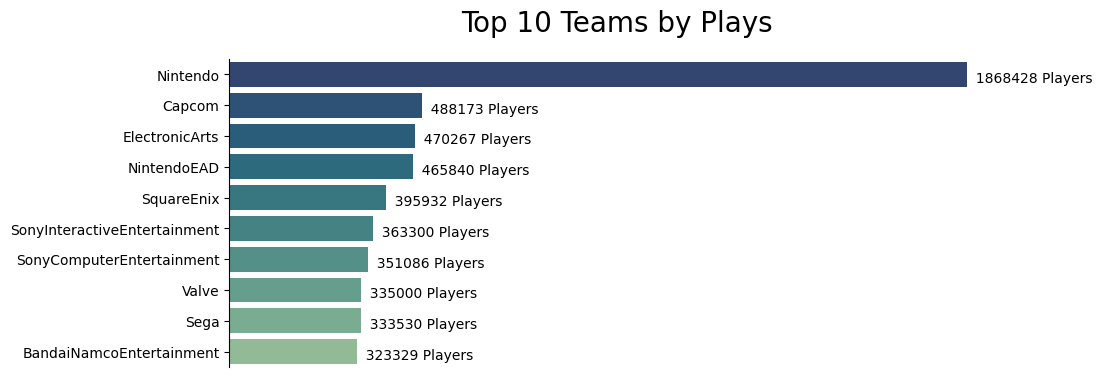

In [18]:
#tornar um gráfico
plt.figure(figsize=(10, 4))
sns.barplot(x=teams_plays.sort_values(ascending=False).head(10),
            y=teams_plays.sort_values(ascending=False).head(10).index,
            palette="crest_r",
            orient='h')

for i, v in enumerate(teams_plays.sort_values(ascending=False).head(10)):
    plt.text(v + 3, i + .25, '  ' + str(v) + ' Players', color='black')

plt.xticks([])
sns.despine(bottom=True)
plt.title("Top 10 Teams by Plays", fontsize=20, pad=20)
plt.show()

### Release Date

In [19]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['Release Date'].dt.month_name().value_counts().reindex(order)

Release Date
January       89
February     111
March        139
April         85
May           83
June         104
July          91
August        87
September    189
October      191
November     218
December     112
Name: count, dtype: int64

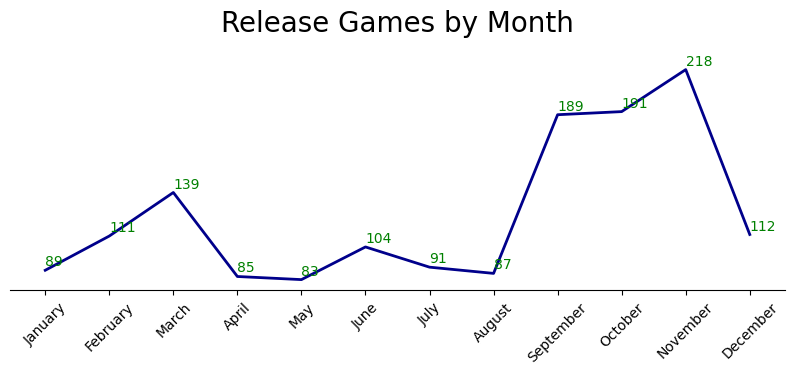

In [30]:
plt.figure(figsize=(10, 3))
sns.lineplot(x=df['Release Date'].dt.month_name().value_counts().reindex(order).index,
                y=df['Release Date'].dt.month_name().value_counts().reindex(order).values,
                sort=False,
                linewidth=2,
                color='darkblue')

plt.xticks(rotation=45)
plt.xlabel('')
plt.yticks([])
sns.despine(left=True)
# adicionar aos pontos os valores
for i, v in enumerate(df['Release Date'].dt.month_name().value_counts().reindex(order).values):
    plt.text(i, v + 3, str(v), color='green')
plt.title("Release Games by Month", fontsize=20, pad=20)
plt.show()


### Correlation

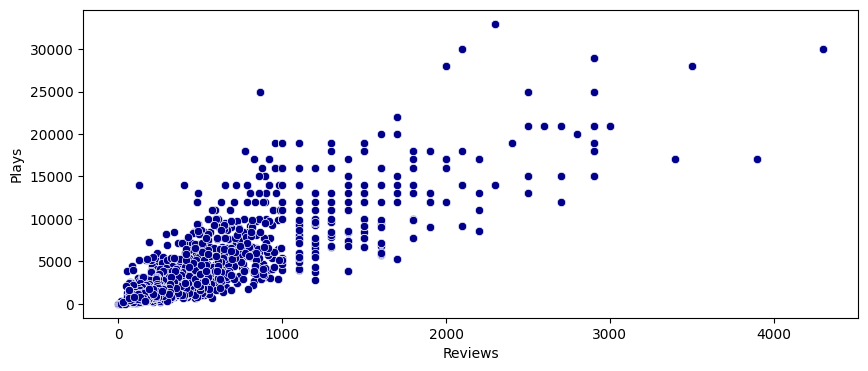

In [32]:
#relação entre wishlist e plays
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df['Reviews'],
                y=df['Plays'],
                color='darkblue')

plt.show()
